In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.func import grad, vmap, hessian, jacfwd, jacrev


In [45]:
class Policy(nn.Module):
    def __init__(self, ):
        super().__init__()
        self.input_fc = nn.Linear(4, 3)
        self.hidden_fc = nn.Linear(3, 3)
        self.out_fc = nn.Linear(3, 2)
    
    def forward(self, x):
        x = F.tanh(self.input_fc(x))
        x = F.tanh(self.hidden_fc(x))
        x = self.out_fc(x)
        return x

In [86]:
def model(weights, x):
    return torch.tanh(x.dot(weights))

In [105]:
torch.manual_seed(42)
weights = torch.randn(4, requires_grad=True)
examples = torch.randn(7, 4)
output = model(weights, examples)
print(output)

RuntimeError: 1D tensors expected, but got 2D and 1D tensors

In [106]:
output = vmap(model, in_dims=(None, 0))(weights, examples)
print(output)

tensor([ 0.2620, -0.2274, -0.2316, -0.0540,  0.2235, -0.5061,  0.1701],
       grad_fn=<TanhBackward0>)


In [103]:
torch.manual_seed(42)
weights = torch.randn((7, 4), requires_grad=True)
examples = torch.randn(4)
output = vmap(model, in_dims=(0, None))(weights, examples)
print(output)

tensor([ 0.5955, -0.8633,  0.8782, -0.2237, -0.2024, -0.0707,  0.7701],
       grad_fn=<TanhBackward0>)


In [104]:
torch.manual_seed(42)
weights = torch.randn((7, 4), requires_grad=True)
examples = torch.randn(7, 4)
output = vmap(model, in_dims=(0, 0))(weights, examples)
print(output)

tensor([ 0.9974, -0.5747,  0.6330, -0.1288,  0.9984, -0.8981,  0.9824],
       grad_fn=<TanhBackward0>)


In [77]:
output = model(weights, torch.randn([7, 4]))
print(output)

RuntimeError: 1D tensors expected, but got 2D and 1D tensors

In [72]:
policy = Policy()
out = policy(torch.randn([7, 4]))
out.shape

torch.Size([7, 2])

In [46]:
def print_gradient(net):
    for p in net.parameters():
        print(p.grad)

In [49]:
policy = Policy()

torch.manual_seed(42)
state1 = torch.randn(4)
out1 = policy(state1)
print("-"*32)
print("Out")
print(out1)

torch.manual_seed(55)
state2 = torch.randn(4)
out2 = policy(state2)
print(out2)

true = torch.tensor([0.5, 0.5])
loss1 = F.mse_loss(true, out1)
loss2 = F.mse_loss(true, out2)
print("-"*32)
print("Loss")
print(loss1)
print(loss2)
print("-"*32)
print("Gradients")
print_gradient(policy)
print("-"*32)
print("Gradients backward 1")
loss1.backward()
print_gradient(policy)
print("-"*32)
print("Gradients backward 2")
loss2.backward()
print_gradient(policy)




--------------------------------
Out
tensor([-0.5106,  0.0694], grad_fn=<AddBackward0>)
tensor([-0.6150,  0.4325], grad_fn=<AddBackward0>)
--------------------------------
Loss
tensor(0.6033, grad_fn=<MseLossBackward0>)
tensor(0.6239, grad_fn=<MseLossBackward0>)
--------------------------------
Gradients
None
None
None
None
None
None
--------------------------------
Gradients backward 1
tensor([[-0.0099, -0.0038, -0.0069, -0.0068],
        [ 0.0075,  0.0029,  0.0052,  0.0052],
        [ 0.0159,  0.0061,  0.0111,  0.0109]])
tensor([-0.0294,  0.0224,  0.0473])
tensor([[ 0.1060, -0.1415, -0.0192],
        [-0.0661,  0.0882,  0.0120],
        [ 0.0369, -0.0492, -0.0067]])
tensor([-0.2717,  0.1694, -0.0945])
tensor([[0.3334, 0.0222, 0.5116],
        [0.1421, 0.0094, 0.2180]])
tensor([-1.0106, -0.4306])
--------------------------------
Gradients backward 2
tensor([[ 0.0380,  0.1084, -0.0780,  0.0187],
        [ 0.0387,  0.0759, -0.0410,  0.0217],
        [-0.0029, -0.0381,  0.0391,  0.0009]]

In [51]:
policy = Policy()

torch.manual_seed(42)
state1 = torch.randn(4)
out1 = policy(state1)
print("-"*32)
print("Out")
print(out1)

torch.manual_seed(55)
state2 = torch.randn(4)
out2 = policy(state2)
print(out2)

true = torch.tensor([0.5, 0.5])
loss1 = F.mse_loss(true, out1)
loss2 = F.mse_loss(true, out2)
print("-"*32)
print("Loss")
print(loss1)
print(loss2)
print("-"*32)
print("Gradients")
print_gradient(policy)
print("-"*32)
print("Gradients backward 2")
loss2.backward()
print_gradient(policy)
print("-"*32)
print("Gradients backward 1")
loss1.backward()
print_gradient(policy)





--------------------------------
Out
tensor([-0.5106,  0.0694], grad_fn=<AddBackward0>)
tensor([-0.6150,  0.4325], grad_fn=<AddBackward0>)
--------------------------------
Loss
tensor(0.6033, grad_fn=<MseLossBackward0>)
tensor(0.6239, grad_fn=<MseLossBackward0>)
--------------------------------
Gradients
None
None
None
None
None
None
--------------------------------
Gradients backward 2
tensor([[ 0.0479,  0.1122, -0.0712,  0.0255],
        [ 0.0312,  0.0730, -0.0463,  0.0166],
        [-0.0189, -0.0442,  0.0280, -0.0100]])
tensor([-0.0496, -0.0323,  0.0195])
tensor([[ 0.0445,  0.0689, -0.0240],
        [-0.1190, -0.1841,  0.0642],
        [ 0.0368,  0.0568, -0.0198]])
tensor([-0.1103,  0.2949, -0.0910])
tensor([[ 0.1867, -0.4885, -0.1306],
        [ 0.0113, -0.0296, -0.0079]])
tensor([-1.1150, -0.0675])
--------------------------------
Gradients backward 1
tensor([[ 0.0380,  0.1084, -0.0780,  0.0187],
        [ 0.0387,  0.0759, -0.0410,  0.0217],
        [-0.0029, -0.0381,  0.0391,  0.

In [57]:
input_ = torch.randn([])
func = torch.sin
cos = grad(func)

In [61]:
output_ = cos(torch.tensor(0.))
output_

tensor(1.)

In [62]:
output_ = torch.cos(torch.tensor(0.))
output_

tensor(1.)

In [68]:
neg_sin = grad(cos)
output_ = neg_sin(torch.tensor(torch.pi / 2))
output_

tensor(-1.)

In [69]:
output_ = torch.sin(torch.tensor(torch.pi / 2))
output_

tensor(1.)

In [119]:
def f(x):
    x1, x2 = x
    return x1 ** 3 + 2 *x1 * x2 + x2 ** 3

In [120]:
hessian_f = hessian(f)

In [123]:
input_= torch.tensor([1.0, 1.0])
hess = hessian_f(input_)

In [124]:
hess

tensor([[6., 2.],
        [2., 6.]])

In [125]:
def f2(x):
    x1, x2 = x
    return x1 ** 3, x2 ** 3

In [127]:
hessian_f2 = hessian(f2)
input_= torch.tensor([1.0, 1.0])
hess = hessian_f2(input_)
print(hess)


(tensor([[6., 0.],
        [0., 0.]]), tensor([[0., 0.],
        [0., 6.]]))


In [131]:
x = torch.randn(2)
jacobian = jacfwd(f2)(x)
jacobian

(tensor([0.0673, 0.0000]), tensor([0.0000, 0.1309]))

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        output = x
        return output

def loss_fn(predictions, targets):
    return F.nll_loss(predictions, targets)

In [4]:
device = 'cuda'

num_models = 10
batch_size = 64
data = torch.randn(batch_size, 1, 28, 28, device=device)

targets = torch.randint(10, (64,), device=device)

In [25]:
model = SimpleCNN().to(device=device)
predictions = model(data) # move the entire mini-batch through the model

loss = loss_fn(predictions, targets)
# loss.backward() # back propogate the 'average' gradient of this mini-batch

In [28]:
grad = torch.autograd.grad(loss, model.parameters())

In [24]:
grad

(tensor([[[[-2.2089e-03, -6.2267e-04, -4.9707e-04],
           [-3.0661e-03,  5.1212e-04, -1.4034e-03],
           [-1.1445e-03, -1.1397e-03,  3.2198e-04]]],
 
 
         [[[-4.0881e-03, -2.4897e-04, -2.7835e-03],
           [ 2.8883e-03,  1.5631e-03, -1.0181e-03],
           [-5.9385e-03, -3.3814e-03,  2.2684e-04]]],
 
 
         [[[ 1.8838e-03, -9.2863e-04,  8.8398e-04],
           [ 2.8276e-03, -3.4123e-03, -2.9668e-03],
           [ 1.7818e-03, -1.2885e-03, -2.6468e-03]]],
 
 
         [[[-1.8404e-03, -6.5563e-04, -9.2311e-04],
           [ 4.2281e-03, -3.2949e-04,  1.2964e-04],
           [ 9.3796e-05, -1.4823e-03, -7.7952e-04]]],
 
 
         [[[ 2.2720e-03,  1.6101e-03,  1.2282e-03],
           [ 4.0830e-03, -2.5433e-03, -3.4472e-03],
           [ 2.3777e-03, -5.6451e-04, -2.7303e-03]]],
 
 
         [[[ 9.0371e-04, -6.3975e-04,  2.1883e-03],
           [-1.8931e-03, -1.5285e-03, -2.8925e-04],
           [-2.2178e-03,  2.2870e-04, -3.6063e-03]]],
 
 
         [[[-4.6432e-04, -1.

In [52]:
a = torch.tensor(2.0)
b = torch.tensor(1.0)
c = [a, b]
d = torch.mean(torch.tensor(c))
print(d)
e = torch.sum(torch.tensor(c))
e

tensor(1.5000)


tensor(3.)

In [54]:
a = torch.tensor([])

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

In [9]:
a = torch.eye(4)

In [24]:
a[0, 2] = 0.3
a[1, 3] = -0.9

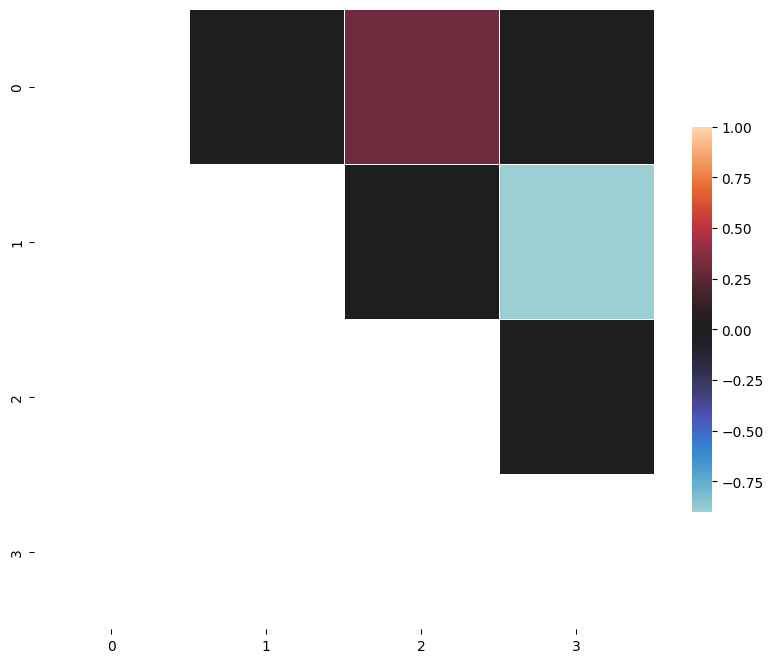

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.tril(np.ones_like(a, dtype=bool))
g = sns.heatmap(a, mask=mask, vmax=1.0, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
# wandb.log({"plot":fig})

In [35]:
mask = np.triu(np.ones_like(np.ones([4, 4]), dtype=bool))
np.fill_diagonal(mask, False)
mask


array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True],
       [False, False, False, False]])

In [34]:
diag = np.diagonal(np.ones([4, 4]))
diag

array([1., 1., 1., 1.])

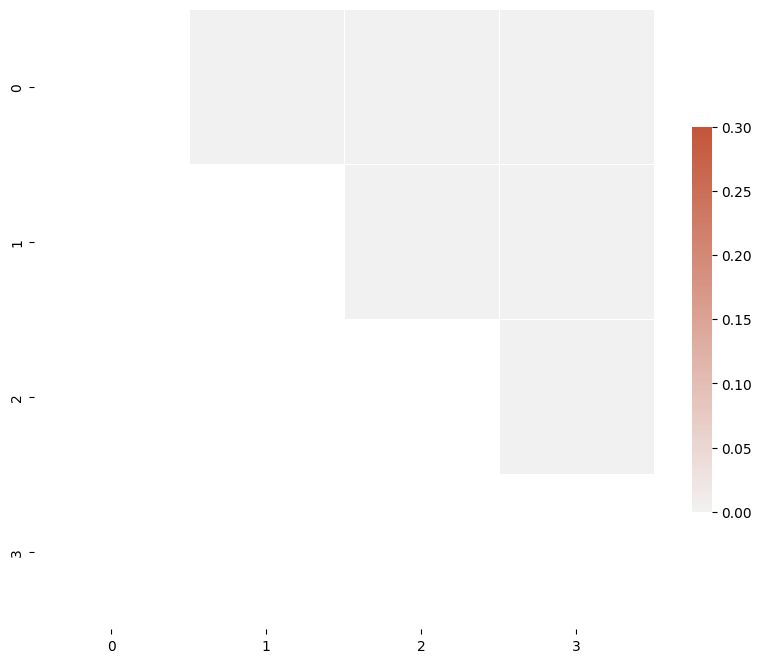

In [18]:
g.figure

In [56]:
b = a + torch.ones([10,])
b

RuntimeError: The size of tensor a (0) must match the size of tensor b (10) at non-singleton dimension 0

In [ ]:
a.mean

In [7]:
out = loss.retain_grad()

In [13]:
model.conv1.weight.grad

tensor([[[[ 3.4254e-03,  1.8971e-03,  1.3855e-03],
          [-2.3087e-03, -2.4522e-03, -2.7523e-03],
          [ 1.2211e-03,  4.4381e-03, -3.8151e-03]]],


        [[[ 2.5369e-03,  1.3583e-03,  1.7925e-03],
          [ 2.7614e-03,  2.3689e-03, -1.9222e-03],
          [ 1.7296e-04,  2.8222e-06,  2.4934e-03]]],


        [[[ 4.5194e-03, -7.5458e-05,  1.1343e-03],
          [ 3.2135e-03, -1.0193e-03,  2.6348e-03],
          [ 1.4243e-04,  7.1246e-03,  1.0681e-03]]],


        [[[ 2.1538e-03, -2.4196e-03,  1.0600e-03],
          [-2.1031e-03,  8.5481e-04,  2.8559e-04],
          [-1.2824e-03, -1.1185e-03, -2.2762e-03]]],


        [[[-1.1875e-03, -3.4017e-03,  2.1573e-03],
          [-7.5445e-04, -2.2553e-03, -3.1270e-03],
          [ 6.1012e-03,  9.6021e-04,  2.3630e-03]]],


        [[[-3.0420e-04, -4.0214e-03,  1.0763e-03],
          [ 1.0182e-03,  8.3798e-04,  6.2783e-04],
          [-3.7354e-03, -5.2280e-04,  1.4669e-03]]],


        [[[ 3.7013e-03,  5.8305e-04, -3.3135e-03],
       

In [14]:
for name, params in model.named_parameters():
    print(name)

conv1.weight
conv1.bias
conv2.weight
conv2.bias
fc1.weight
fc1.bias
fc2.weight
fc2.bias


In [19]:
for name, params in model.named_parameters():
    print(params.grad)

tensor([[[[ 3.4254e-03,  1.8971e-03,  1.3855e-03],
          [-2.3087e-03, -2.4522e-03, -2.7523e-03],
          [ 1.2211e-03,  4.4381e-03, -3.8151e-03]]],


        [[[ 2.5369e-03,  1.3583e-03,  1.7925e-03],
          [ 2.7614e-03,  2.3689e-03, -1.9222e-03],
          [ 1.7296e-04,  2.8222e-06,  2.4934e-03]]],


        [[[ 4.5194e-03, -7.5458e-05,  1.1343e-03],
          [ 3.2135e-03, -1.0193e-03,  2.6348e-03],
          [ 1.4243e-04,  7.1246e-03,  1.0681e-03]]],


        [[[ 2.1538e-03, -2.4196e-03,  1.0600e-03],
          [-2.1031e-03,  8.5481e-04,  2.8559e-04],
          [-1.2824e-03, -1.1185e-03, -2.2762e-03]]],


        [[[-1.1875e-03, -3.4017e-03,  2.1573e-03],
          [-7.5445e-04, -2.2553e-03, -3.1270e-03],
          [ 6.1012e-03,  9.6021e-04,  2.3630e-03]]],


        [[[-3.0420e-04, -4.0214e-03,  1.0763e-03],
          [ 1.0182e-03,  8.3798e-04,  6.2783e-04],
          [-3.7354e-03, -5.2280e-04,  1.4669e-03]]],


        [[[ 3.7013e-03,  5.8305e-04, -3.3135e-03],
       

In [152]:
def compute_grad(sample, target):
    
    sample = sample.unsqueeze(0)  # prepend batch dimension for processing
    target = target.unsqueeze(0)
    prediction = model(sample)
    loss = loss_fn(prediction, target)

    return torch.autograd.grad(loss, list(model.parameters()))


def compute_sample_grads(data, targets):
    """ manually process each sample with per sample gradient """
    sample_grads = [compute_grad(data[i], targets[i]) for i in range(batch_size)]
    print(len(sample_grads))
    print(len(sample_grads[0]))
    # print(sample_grads[0])
    print(sample_grads[0][0].shape)
    print(sample_grads[0][1].shape)
    print(sample_grads[0][2].shape)
    print(sample_grads[0][3].shape)
    print(sample_grads[0][4].shape)
    print(sample_grads[0][5].shape)
    print(sample_grads[0][6].shape)
    print(sample_grads[0][7].shape)
    sample_grads = zip(*sample_grads)
    sample_grads = [torch.stack(shards) for shards in sample_grads]
    return sample_grads

per_sample_grads = compute_sample_grads(data, targets)

64
8
torch.Size([32, 1, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([128, 9216])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


In [143]:
len(per_sample_grads)

8

In [153]:
print(per_sample_grads[0].shape) # conv
print(per_sample_grads[1].shape) # conv bias
print(per_sample_grads[2].shape) # conv2
print(per_sample_grads[3].shape) # conv2 bias
print(per_sample_grads[4].shape) # fc
print(per_sample_grads[5].shape) # fc bias
print(per_sample_grads[6].shape) # fc2
print(per_sample_grads[7].shape) # fc2 bias

torch.Size([64, 32, 1, 3, 3])
torch.Size([64, 32])
torch.Size([64, 64, 32, 3, 3])
torch.Size([64, 64])
torch.Size([64, 128, 9216])
torch.Size([64, 128])
torch.Size([64, 10, 128])
torch.Size([64, 10])


In [29]:
from functorch import make_functional, make_functional_with_buffers
fmodel, params, buffers = make_functional_with_buffers(model)

/home/kukjin/.conda/envs/test_env/lib/python3.10/site-packages/torch/_functorch/deprecated.py:101: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional_with_buffers is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional_with_buffers', 'torch.func.functional_call')


In [30]:
fmodel

FunctionalModuleWithBuffers(
  (stateless_model): SimpleCNN(
    (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (fc1): Linear(in_features=9216, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [31]:
params

(Parameter containing:
 tensor([[[[-0.3067,  0.1911, -0.0259],
           [ 0.0543, -0.0036,  0.1500],
           [-0.0356,  0.1882, -0.1082]]],
 
 
         [[[-0.0662,  0.3118,  0.3192],
           [ 0.0460, -0.2665,  0.0266],
           [ 0.3210,  0.0676,  0.1080]]],
 
 
         [[[-0.1433,  0.2671, -0.0225],
           [-0.2632, -0.0259, -0.0070],
           [ 0.2196, -0.0851,  0.1175]]],
 
 
         [[[ 0.3034,  0.2779,  0.1222],
           [ 0.0174, -0.1194,  0.1674],
           [ 0.2485, -0.1795, -0.0161]]],
 
 
         [[[ 0.1628, -0.2604, -0.0544],
           [-0.1605, -0.0911,  0.1703],
           [-0.1051,  0.0225, -0.0319]]],
 
 
         [[[-0.0515,  0.3208,  0.0474],
           [ 0.2314, -0.2939, -0.0184],
           [-0.1988, -0.3276,  0.1966]]],
 
 
         [[[-0.0996,  0.1013,  0.2949],
           [ 0.2433,  0.0225,  0.0268],
           [-0.0105, -0.2354, -0.0066]]],
 
 
         [[[ 0.3243,  0.2703,  0.1242],
           [-0.3195,  0.1039,  0.1193],
           [ 0.

In [32]:
buffers

()

In [33]:
def compute_loss_stateless_model (params, buffers, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = fmodel(params, buffers, batch) 
    loss = loss_fn(predictions, targets)
    return loss

In [34]:
ft_compute_grad = grad(compute_loss_stateless_model)


TypeError: 'tuple' object is not callable

In [173]:
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, 0, 0))

/home/kukjin/.conda/envs/test_env/lib/python3.10/site-packages/torch/_functorch/deprecated.py:58: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


In [174]:
ft_per_sample_grads = ft_compute_sample_grad(params, buffers, data, targets)

In [180]:
print(len(ft_per_sample_grads))
print(ft_per_sample_grads[0].shape)
print(ft_per_sample_grads[1].shape)
print(ft_per_sample_grads[2].shape)
print(ft_per_sample_grads[3].shape)
print(ft_per_sample_grads[4].shape)
print(ft_per_sample_grads[5].shape)
print(ft_per_sample_grads[6].shape)
print(ft_per_sample_grads[7].shape)





8
torch.Size([64, 32, 1, 3, 3])
torch.Size([64, 32])
torch.Size([64, 64, 32, 3, 3])
torch.Size([64, 64])
torch.Size([64, 128, 9216])
torch.Size([64, 128])
torch.Size([64, 10, 128])
torch.Size([64, 10])


In [168]:
from torch.func import functionalize
func_model, params = functionalize(model)

TypeError: cannot unpack non-iterable function object

In [161]:
from torch.func import functional_call
output = functional_call(model.named_parameters(), model.named_buffers(),
                         sample, target)

TypeError: functional_call() missing 2 required positional arguments: 'parameter_and_buffer_dicts' and 'args'

In [35]:
from collections import defaultdict
from functools import partial
from pathlib import Path
import shutil
import sys
import time
from typing import Any, Dict, Optional, Tuple, OrderedDict
import random
import hydra
from hydra.utils import instantiate
from hydra.utils import get_original_cwd, to_absolute_path
from omegaconf import DictConfig, OmegaConf, open_dict
from torch.utils.tensorboard import SummaryWriter
from collections import deque
from tqdm import tqdm
import wandb
import ray

import envpool
# import gymnasium as gym
import gym
from gym.spaces import Box, Discrete
from gym.spaces.dict import Dict as GymDict
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.func
from src.functional_agent import FuncPPOAgentSep
from src.utils import set_seed, make_batched_env
                            

/home/kukjin/.conda/envs/test_env/lib/python3.10/site-packages/glfw/__init__.py:916: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [36]:
cfg_path = "/home/kukjin/kukjin/Projects/MultiEnvRL/DARL_refactored/configs/ppo_trainer.yaml"
nn_cfg_path = "/home/kukjin/kukjin/Projects/MultiEnvRL/DARL_refactored/configs/nn/nn.yaml"
ppo_cfg_path = "/home/kukjin/kukjin/Projects/MultiEnvRL/DARL_refactored/configs/ppo/ppo.yaml"

In [37]:
cfg = OmegaConf.load(cfg_path)
nn_cfg = OmegaConf.load(nn_cfg_path)
ppo_cfg = OmegaConf.load(ppo_cfg_path)
cfg.nn = nn_cfg
cfg.ppo = ppo_cfg
cfg

{'defaults': [{'ppo': 'ppo'}, {'nn': 'nn'}, '_self_'], 'hydra': {'run': {'dir': 'outputs/${now:%Y-%m-%d/%H-%M-%S}'}}, 'experiment': {'env_ids': ['CartPole-v1'], 'seed': 42, 'max_episode_steps': 1000, 'num_rollout_steps': 128, 'num_train_envs': 64, 'num_envs': 64, 'total_timesteps': 10000000, 'save_ckpt': False, 'num_checkpoints': 20, 'print_interval': 100, 'stop_after_epochs': 500, 'capture_video': False, 'device': 0, 'cuda': True, 'torch_deterministic': True, 'resume': False, 'resume_update_idx': 0, 'resume_dir': 'None'}, 'evaluation': {'eval_seed': 3142, 'every': 8, 'num_eval': 5, 'num_test_envs': 5}, 'wandb': {'mode': 'online', 'project': 'DomainAgnosticRL', 'entity': None, 'name': None, 'group': None, 'tags': None, 'notes': None}, 'paths': {'dir': 'outputs/${now:%Y-%m-%d/%H-%M-%S}', 'log': 'outputs/${now:%Y-%m-%d/%H-%M-%S}/runs', 'video': 'outputs/${now:%Y-%m-%d/%H-%M-%S}/videos', 'checkpoints': 'outputs/${now:%Y-%m-%d/%H-%M-%S}/checkpoints', 'src': 'outputs/${now:%Y-%m-%d/%H-%M-%S

In [38]:
cfg.nn

{'lr': {'actor': 0.0001, 'critic': 0.0005}, 'weight_decay': {'actor': 0.0, 'critic': 0.0}, 'encoder': {'type': 'rnn', 'final_activation': 'identity', 'initializer': 'uniform', 'hidden_dim': 128}, 'decoder': {'type': 'rnn', 'final_activation': 'identity', 'initializer': 'uniform'}, 'shared_networks': {'type': 'transformer', 'hidden_dim': 128, 'expansion_factor': 128, 'output_dim': 128, 'dropout': 0.0, 'activation': 'tanh'}, 'transformer': {'num_heads': 1, 'num_encoder_layers': 1, 'dim_feedforward': 128, 'dropout': 0.2, 'activation': 'gelu'}}

In [39]:
cfg.ppo

{'clip_logstd': False, 'clip_logstd_max': 3, 'clip_logstd_min': -5, 'anneal_lr': False, 'update_epochs': 10, 'num_minibatches': 8, 'batch_size': 'None', 'minibatch_size': 'None', 'max_grad_norm': 0.5, 'norm_adv': True, 'const_coef': 0.0, 'clip_coef': 0.2, 'clip_vloss': True, 'ent_coef': 0.0, 'vf_coef': 0.5, 'gamma': 0.99, 'gae_lambda': 0.95}

In [40]:
device = cfg.experiment.device
cfg.experiment.num_train_envs = 2
cfg.experiment.num_envs = 2


agent = FuncPPOAgentSep(cfg)
total_num_params = sum([np.prod(p.size()) for p in agent.parameters()])
actor_params = dict(agent.actor.named_parameters())
critic_params = dict(agent.critic.named_parameters())
        

In [41]:
actor_params.keys()

dict_keys(['obs_encoder.rnn.weight_ih_l0', 'obs_encoder.rnn.weight_hh_l0', 'obs_encoder.rnn.weight_ih_l0_reverse', 'obs_encoder.rnn.weight_hh_l0_reverse', 'obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_weight', 'obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_bias', 'obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.weight', 'obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.bias', 'obs_encoder.transformer_encoder.layers.0.linear1.weight', 'obs_encoder.transformer_encoder.layers.0.linear1.bias', 'obs_encoder.transformer_encoder.layers.0.linear2.weight', 'obs_encoder.transformer_encoder.layers.0.linear2.bias', 'obs_encoder.transformer_encoder.layers.0.norm1.weight', 'obs_encoder.transformer_encoder.layers.0.norm1.bias', 'obs_encoder.transformer_encoder.layers.0.norm2.weight', 'obs_encoder.transformer_encoder.layers.0.norm2.bias', 'policy_mean_decoder.rnn.weight_ih_l0', 'policy_mean_decoder.rnn.weight_hh_l0', 'policy_mean_decoder.rnn.weight_ih_

In [42]:
total_policy_grad = dict()

In [43]:
for key in actor_params.keys():
    total_policy_grad.setdefault(key, 0)
    

In [44]:
total_policy_grad

{'obs_encoder.rnn.weight_ih_l0': 0,
 'obs_encoder.rnn.weight_hh_l0': 0,
 'obs_encoder.rnn.weight_ih_l0_reverse': 0,
 'obs_encoder.rnn.weight_hh_l0_reverse': 0,
 'obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_weight': 0,
 'obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_bias': 0,
 'obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.weight': 0,
 'obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.bias': 0,
 'obs_encoder.transformer_encoder.layers.0.linear1.weight': 0,
 'obs_encoder.transformer_encoder.layers.0.linear1.bias': 0,
 'obs_encoder.transformer_encoder.layers.0.linear2.weight': 0,
 'obs_encoder.transformer_encoder.layers.0.linear2.bias': 0,
 'obs_encoder.transformer_encoder.layers.0.norm1.weight': 0,
 'obs_encoder.transformer_encoder.layers.0.norm1.bias': 0,
 'obs_encoder.transformer_encoder.layers.0.norm2.weight': 0,
 'obs_encoder.transformer_encoder.layers.0.norm2.bias': 0,
 'policy_mean_decoder.rnn.weight_ih_l0': 0,
 'policy_mean_deco

In [ ]:
def sum_grads(params, total_grad_dict, env_grad_dict):
    for key in params.keys():
        total_grad_dict[key] += env_grad_dict[key]

In [45]:
action_space = Box(low=-1.0, high=1.0, shape=(4,))
obs = torch.randn([32, 17])
actions = torch.randn([32, 4])
old_log_probs = torch.randn([32,])
advantages = torch.randn([32,])


In [46]:
action, log_prob, entropy, value = agent.get_action_and_value(
    actor_params,
    critic_params,
    action_space,
    obs
)

In [51]:
action.shape

torch.Size([32, 4])

In [47]:
policy_grad, policy_loss, entropy_loss = agent.compute_grad_and_policy_loss(actor_params,
                                   action_space,
                                   obs,
                                   actions,
                                   old_log_probs,
                                   advantages)

/home/kukjin/.conda/envs/test_env/lib/python3.10/site-packages/torch/_functorch/deprecated.py:66: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.grad_and_value is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.grad_and_value instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('grad_and_value')


In [48]:
policy_grad

{'obs_encoder.rnn.weight_ih_l0': tensor([[ 4.1840e-06],
         [ 5.6890e-07],
         [ 8.1663e-07],
         [-5.8885e-08],
         [ 4.9224e-07],
         [ 1.2302e-07],
         [ 1.2471e-06],
         [-7.0023e-07],
         [-5.0591e-08],
         [ 1.0565e-06],
         [ 1.2605e-07],
         [-3.4430e-07],
         [-2.7008e-06],
         [-5.7405e-07],
         [ 3.6546e-06],
         [ 2.1551e-07],
         [ 1.2894e-07],
         [-8.7099e-08],
         [-1.9651e-07],
         [-4.0859e-07],
         [ 6.2901e-10],
         [-1.8148e-07],
         [-2.0902e-07],
         [ 4.3948e-07],
         [ 9.8775e-08],
         [-4.1217e-08],
         [-8.3186e-09],
         [-1.3312e-06],
         [ 3.6558e-08],
         [-8.2609e-07],
         [ 1.0150e-07],
         [ 7.4433e-07],
         [-1.3070e-06],
         [-2.5546e-07],
         [ 5.6925e-07],
         [ 6.8467e-07],
         [-6.2044e-07],
         [ 2.1496e-06],
         [-7.5377e-07],
         [ 4.9287e-08],
        

In [21]:
import torchopt
optimizer = torchopt.adam()

In [22]:
opt_state = optimizer.init(params)


In [16]:
from torch.func import functional_call, vmap, grad, grad_and_value

In [17]:
data = torch.randn([1, 4]).to(device)
action_space = Discrete(4)
output = functional_call(agent, params, (action_space, data, None))

ValueError: Expected parameter_and_buffer_dicts to be a dict, or a list/tuple of dicts, but got <class 'generator'>

In [11]:
print(output)

(tensor([0], device='cuda:1'), tensor([-1.3850], device='cuda:1', grad_fn=<SqueezeBackward1>), tensor([1.3863], device='cuda:1', grad_fn=<NegBackward0>), tensor([[0.0026]], device='cuda:1', grad_fn=<DivBackward0>))


In [12]:
from functorch import make_functional

In [14]:
func, params = make_functional(agent)
data = torch.randn([1, 4]).to(device)
action_space = Discrete(4)
output = func(params, action_space, data, None)
output

RuntimeError: Only Tensors created explicitly by the user (graph leaves) support the deepcopy protocol at the moment

In [27]:
action, dist, entropy, value = output

In [28]:
action

tensor([0], device='cuda:1')

In [115]:
total_num_params

397824

In [116]:
for name, param in agent.named_parameters():
    print(name, param.shape, param.grad)

actor.obs_encoder.rnn.weight_ih_l0 torch.Size([192, 1]) None
actor.obs_encoder.rnn.weight_hh_l0 torch.Size([192, 64]) None
actor.obs_encoder.rnn.weight_ih_l0_reverse torch.Size([192, 1]) None
actor.obs_encoder.rnn.weight_hh_l0_reverse torch.Size([192, 64]) None
actor.obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_weight torch.Size([192, 64]) None
actor.obs_encoder.transformer_encoder.layers.0.self_attn.in_proj_bias torch.Size([192]) None
actor.obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.weight torch.Size([64, 64]) None
actor.obs_encoder.transformer_encoder.layers.0.self_attn.out_proj.bias torch.Size([64]) None
actor.obs_encoder.transformer_encoder.layers.0.linear1.weight torch.Size([64, 64]) None
actor.obs_encoder.transformer_encoder.layers.0.linear1.bias torch.Size([64]) None
actor.obs_encoder.transformer_encoder.layers.0.linear2.weight torch.Size([64, 64]) None
actor.obs_encoder.transformer_encoder.layers.0.linear2.bias torch.Size([64]) None
actor.obs_enco

In [85]:
env_ids = list(cfg.experiment.env_ids)
env_ids

['CartPole-v1', 'LunarLander-v2', 'HalfCheetah-v4', 'Ant-v4']

In [32]:
train_different_envs = []
test_different_envs = []
for j, env_id in enumerate(env_ids):
    train_envs = make_batched_env(j, env_id, cfg, mode='train')
    test_envs = make_batched_env(j, env_id, cfg, mode='test')
    train_different_envs.append(train_envs)
    test_different_envs.append(test_envs)
    print(f"{j+1}/{len(env_ids)}environment {env_id} is loaded...")

NameError: name 'env_ids' is not defined

In [33]:
exp_cfg = cfg.experiment

In [34]:
# set PPO storage for each environment
envs_storages = dict()
for i, envs in enumerate(train_different_envs):
    obs = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs) \
        + envs.single_observation_space.shape).to(device)
    actions = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs) \
        + envs.single_action_space.shape).to(device)
    logprobs = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs)).to(device)
    rewards = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs)).to(device)
    dones = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs)).to(device)
    values = torch.zeros((exp_cfg.num_rollout_steps, exp_cfg.num_envs)).to(device)
    storage = dict()
    storage["obs"] = obs
    storage['actions'] = actions
    storage['logprobs'] = logprobs
    storage['rewards'] = rewards
    storage['dones'] = dones
    storage['values'] = values
    storage['avg_returns'] = deque(maxlen=20)
    envs_storages[i] = storage

In [35]:
batch_size = int(exp_cfg.num_envs * exp_cfg.num_rollout_steps)
minibatch_size = int(batch_size // cfg.ppo.num_minibatches)
        

In [36]:
global_step = 0
start_time = time.time()
next_obsv = []
next_donev = []

In [37]:
for envs in train_different_envs:
    next_obs = envs.reset()
    next_obs = torch.Tensor(next_obs).to(device)
    next_done = torch.zeros(exp_cfg.num_envs).to(device)
    next_obsv.append(next_obs)
    next_donev.append(next_done)
    

In [38]:
start_update_idx = 1
total_num_updates = exp_cfg.total_timesteps // batch_size
total_num_updates = total_num_updates

In [39]:
print(total_num_updates)

39062


In [40]:
total_num_updates = 50

In [41]:
def rollout(update_idx, envs_storages, next_obsv, next_donev, envs_returns, envs_lengths):
    for i, envs in enumerate(train_different_envs):
        for step in range(0, cfg.experiment.num_rollout_steps):
            envs_storages[i]["obs"][step] = next_obsv[i]
            envs_storages[i]["dones"][step] = next_donev[i]

            with torch.no_grad():
                action, logprob, _, value = agent.get_action_and_value(envs.single_action_space, next_obsv[i])

            envs_storages[i]["values"][step] = value.flatten()
            envs_storages[i]["actions"][step] = action
            envs_storages[i]["logprobs"][step] = logprob

            # TRY NOT TO MODIFY: execute the game and log data.
            next_obs, reward, done, infos = envs.step(action.cpu().numpy())
            envs_storages[i]["rewards"][step] = torch.tensor(reward).to(device).view(-1)
            next_obs, next_done = torch.Tensor(next_obs).to(device), torch.Tensor(done).to(device)
            next_obsv[i] = next_obs
            next_donev[i] = next_done
                
            for k, d in enumerate(done):
                if d:
                    # print(f"[{update_idx}/{total_num_updates}] Train. env_name:{env_ids[i]}, global_step={global_step}, episodic_return={infos['r'][k]}")
                    envs_returns[env_ids[i]+'/train'] = infos["r"][k]
                    envs_lengths[env_ids[i]+'/train'] = infos["l"][k]
        print(f"[{update_idx}/{total_num_updates}] Train. env_name:{env_ids[i]}, global_step={global_step}, episodic_return={infos['r'][k]}")
        

In [46]:
grads = None

In [57]:
def train_agent():
    b_inds = np.arange(batch_size)
    clipfracs = []
    total_epochs_envs_loss = 0.0
    total_epochs_value_loss = 0.0
    total_epochs_policy_loss = 0.0
    total_epochs_entropy_loss = 0.0
    
    for epoch in range(cfg.ppo.update_epochs):
        np.random.shuffle(b_inds)
        for start in range(0, batch_size, minibatch_size):
            total_envs_loss = 0.0
            total_value_loss = 0.0
            total_policy_loss = 0.0
            total_entropy_loss = 0.0
            
            for i, envs in enumerate(train_different_envs):
                end = start + minibatch_size
                mb_inds = b_inds[start:end]
                # pg_loss, entropy_loss, v_loss = calculate_ppo_loss(params, i, envs, mb_inds, clipfracs)
                grad_value_func = grad_and_value(calculate_ppo_loss, has_aux=True)
                grad_weights, losses = grad_value_func(params, i, envs, mb_inds, clipfracs)
                print(grad_weights)
                print(losses)
                pg_loss, entropy_loss, v_loss = losses
                loss = pg_loss - cfg.ppo.ent_coef * entropy_loss + v_loss * cfg.ppo.vf_coef + cfg.ppo.const_coef 
                total_value_loss += v_loss
                total_policy_loss += pg_loss
                total_entropy_loss += entropy_loss
                total_envs_loss += loss
            
            print(total_envs_loss)
            agent.optim_zero_grad()
            total_envs_loss.backward()
            agent.optim_step()
            total_epochs_envs_loss += total_envs_loss
            total_epochs_value_loss += total_value_loss
            total_epochs_policy_loss += total_policy_loss
            total_epochs_entropy_loss += total_entropy_loss
            
    total_epochs_envs_loss = total_epochs_envs_loss / cfg.ppo.update_epochs / cfg.ppo.num_minibatches
    total_epochs_value_loss = total_epochs_value_loss / cfg.ppo.update_epochs / cfg.ppo.num_minibatches
    total_epochs_policy_loss = total_epochs_policy_loss / cfg.ppo.update_epochs / cfg.ppo.num_minibatches
    total_epochs_entropy_loss = total_epochs_entropy_loss / cfg.ppo.update_epochs / cfg.ppo.num_minibatches
    
    return total_epochs_envs_loss, total_epochs_value_loss, total_epochs_policy_loss, total_epochs_entropy_loss

def calculate_ppo_loss(params, env_index, envs, mb_inds, clipfracs):
    i = env_index
    mb_obs = envs_storages[i]['b_obs'][mb_inds]
    mb_actions = envs_storages[i]['b_actions'][mb_inds]
    mb_logprobs = envs_storages[i]['b_logprobs'][mb_inds]
    _, newlogprob, entropy, newvalue = functional_call(agent, params, (envs.action_space, mb_obs, mb_actions))
    #agent.get_action_and_value(envs.single_action_space, mb_obs, mb_actions)
    logratio = newlogprob - mb_logprobs
    ratio = logratio.exp()

    with torch.no_grad():
        # calculate approx_kl http://joschu.net/blog/kl-approx.html
        old_approx_kl = (-logratio).mean()
        approx_kl = ((ratio - 1) - logratio).mean()
        clipfracs += [((ratio - 1.0).abs() > cfg.ppo.clip_coef).float().mean().item()]

    mb_advantages = envs_storages[i]['b_advantages'][mb_inds]
    if cfg.ppo.norm_adv:
        mb_advantages = (mb_advantages - mb_advantages.mean()) / (mb_advantages.std() + 1e-8)

    # Policy loss
    pg_loss1 = -mb_advantages * ratio
    pg_loss2 = -mb_advantages * torch.clamp(ratio, 1 - cfg.ppo.clip_coef, 1 + cfg.ppo.clip_coef)
    pg_loss = torch.max(pg_loss1, pg_loss2).mean()

    # Value loss
    mb_returns = envs_storages[i]['b_returns'][mb_inds].view(-1)
    mb_values = envs_storages[i]['b_values'][mb_inds].view(-1)
    newvalue = newvalue.view(-1)
    if cfg.ppo.clip_vloss:
        v_loss_unclipped = (newvalue - mb_returns) ** 2
        v_clipped = mb_values + torch.clamp(
            newvalue - mb_values,
            -cfg.ppo.clip_coef,
            cfg.ppo.clip_coef,
        )
        v_loss_clipped = (v_clipped - mb_returns) ** 2
        v_loss_max = torch.max(v_loss_unclipped, v_loss_clipped)
        v_loss = 0.5 * v_loss_max.mean()
    else:
        v_loss = 0.5 * ((newvalue - mb_returns) ** 2).mean()

    # regularization term                            
    entropy_loss = entropy.mean()
    return pg_loss, entropy_loss, v_loss

In [58]:
for update_idx in range(start_update_idx, total_num_updates + 1):
    envs_returns = dict()
    envs_lengths = dict()
    rollout_start_time = time.time()
    rollout(update_idx, envs_storages, next_obsv, next_donev, envs_returns, envs_lengths)
    global_step += 1 * exp_cfg.num_envs * exp_cfg.num_rollout_steps
    
    # bootstrap value if not done
    with torch.no_grad():
        for i, envs in enumerate(train_different_envs):
            next_value = agent.get_value(next_obsv[i]).reshape(1, -1)
            envs_storages[i]['advantages'] = torch.zeros_like(envs_storages[i]['rewards']).to(device)
            lastgaelam = 0
            for t in reversed(range(exp_cfg.num_rollout_steps)):
                if t == exp_cfg.num_rollout_steps - 1:
                    nextnonterminal = 1.0 - next_donev[i]
                    nextvalues = next_value
                else:
                    nextnonterminal = 1.0 - envs_storages[i]["dones"][t + 1]
                    nextvalues =  envs_storages[i]['values'][t + 1]
                delta = envs_storages[i]['rewards'][t] + cfg.ppo.gamma * nextvalues * nextnonterminal - envs_storages[i]['values'][t]
                envs_storages[i]['advantages'][t] = lastgaelam = delta + cfg.ppo.gamma * cfg.ppo.gae_lambda * nextnonterminal * lastgaelam
            envs_storages[i]['returns'] = envs_storages[i]['advantages'] + envs_storages[i]['values']
    gae_end_time = time.time()
    
    for i, envs in enumerate(train_different_envs):
        envs_storages[i]["b_obs"] = envs_storages[i]["obs"].reshape((-1,) + envs.single_observation_space.shape)
        envs_storages[i]['b_logprobs'] = envs_storages[i]['logprobs'].reshape(-1)
        envs_storages[i]['b_actions'] = envs_storages[i]['actions'].reshape((-1,) + envs.single_action_space.shape)
        envs_storages[i]['b_advantages'] = envs_storages[i]['advantages'].reshape(-1)
        envs_storages[i]['b_returns'] = envs_storages[i]['returns'].reshape(-1)
        envs_storages[i]['b_values'] = envs_storages[i]['values'].reshape(-1)
    
    total_envs_loss, total_value_loss, total_policy_loss, total_entropy_loss = train_agent()
    

    

0.0


AttributeError: 'float' object has no attribute 'backward'

In [ ]:
print(grads)

None


In [ ]:
update_idx

1

In [100]:
from functorch import make_functional_with_buffers, vmap, grad

actor_fmodel, actor_params, buffers = make_functional_with_buffers(agent.actor)

/home/kukjin/.conda/envs/test_env/lib/python3.10/site-packages/torch/_functorch/deprecated.py:101: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.make_functional_with_buffers is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.func.functional_call instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('make_functional_with_buffers', 'torch.func.functional_call')


RuntimeError: Only Tensors created explicitly by the user (graph leaves) support the deepcopy protocol at the moment